# Modelo de Regresión Logística

In [1241]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

## Cargamos los datos de entrada del archivo .csv Train

In [1242]:
# Load data
train = pd.read_csv('../data/Processed/train_processed.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,1,0,0,0,0,0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,0,0,0,0,1,0,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,1,0,0,0,0,0,0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,1,0,0,0,0,0,0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,1,0,0,0,0,0,0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,0,0,0,1,0
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [1243]:
# X = df_train.drop("Transported", axis = 1).values
# y = df_train["Transported"].values

In [1244]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['PassengerId','CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Earth', 'Europa',
       'Mars', 'Cabin_num', 'Cabin_Side_P', 'Cabin_Side_S', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T']]

In [1245]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 23)	y_train: (6085,)
X_test: (2608, 23)	y_test: (2608,)


In [1246]:
# Creamos el modelo y lo entrenamos

model = LogisticRegression(max_iter = 83, solver='newton-cg',random_state=42,  multi_class='auto', C=1.5)
model.fit(X_train, y_train)

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Alberto\AppData\Local\P

LogisticRegression(C=1.5, max_iter=83, random_state=42, solver='newton-cg')

In [1247]:
print(model.classes_)
print(model.coef_)

[False  True]
[[ 7.01602095e-07  1.39403325e+00 -5.96915939e-03 -6.10010226e-02
  -1.47310732e-03  5.49122358e-04  5.92572844e-04 -1.93735788e-03
  -1.74097632e-03 -6.33470168e-01  9.25679653e-01 -4.15432201e-02
  -2.14352277e-04 -1.84556266e-01  4.35222530e-01 -1.07452264e-01
   4.10810758e-01  6.28277665e-01 -3.50779614e-02 -5.18532157e-01
   1.12118141e-01 -2.33483892e-01 -5.99402448e-03]]


In [1248]:
#como ya tenemos el modelo entrenado, lo usamos sobre los datos del test para hacer la prediccion

y_hat1=model.predict(X_train)
y_hat2=model.predict(X_test)

print('MODELO REGRESION LOGÍSTICA')
print("ACCURACY TRAIN:", accuracy_score(y_train, y_hat1))
print("ACCURACY TEST:", accuracy_score(y_test, y_hat2))

MODELO REGRESION LOGÍSTICA
ACCURACY TRAIN: 0.7983566146261298
ACCURACY TEST: 0.7787576687116564


In [1249]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=15) #Parte los datos en 15 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\si

[0.79310345 0.7955665  0.79802956 0.79064039 0.7955665  0.77586207
 0.81034483 0.77339901 0.78571429 0.80541872 0.78271605 0.77283951
 0.81234568 0.83703704 0.79012346]
Logistic Regression: 0.794580 (0.016384)


c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


## Visualizamos los datos

In [1250]:
# Matriz de confusion del mejor modelo

import sklearn.metrics as metrics
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 949  340]
 [ 237 1082]]


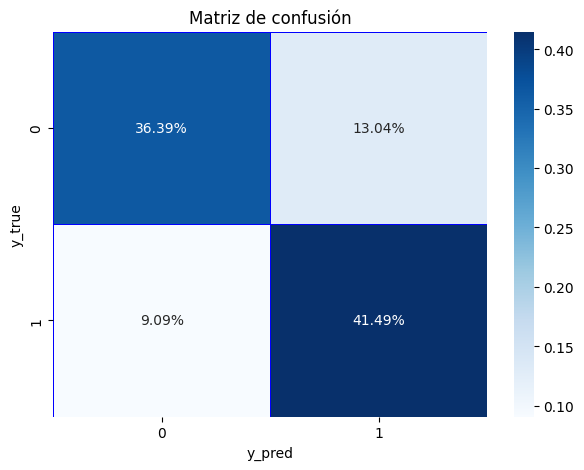

In [1251]:
f, ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, linewidths=0.5, fmt='.2%', linecolor="blue",cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Matriz de confusión")
plt.show()

## Cargamos el CSV Test de Kaggle para pasarle el modelo y guardarlo en un nuevo CSV para enviarlo como submissions

In [1252]:
# Cargamos el dataframe con el CSV original sin feature ingeniering...

train = pd.read_csv('../data/Raw/train.csv', sep=',')
df_trainRaw=pd.DataFrame(train)
df_trainRaw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [1253]:
# sns.jointplot(x=df_trainRaw["Spa"], y=df_train.Spa)

## Cargamos los datos de entrada del archivo .csv Test

In [1254]:
# Load data
test = pd.read_csv('../data/Processed/test_processed.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,1,0,0,0,0,0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
4273,9269_01,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,...,1,0,0,0,0,0,0,0,1,0
4274,9271_01,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,1,0,0,0,0
4275,9273_01,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,1,0,0,0,0


## Hacemos la prediccion

In [1255]:
prediccion_test = pd.DataFrame(model.predict(df_test))
prediccion_test['PassengerId'] =df_test['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('../data/output/Regresion_Logistica.csv', index=False)
prediccion_test

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
